# Mask R-CNN Demo - 4 classes
- 1 - "crater"
- 2 - "dark-dune"
- 3 - "slope-streak"
- 4 - "bright-dune"
- 5 - "impact-ejecta"
- 6 - "swiss-cheese"
- 7 - "spider"   

A quick intro to using the pre-trained model to detect and segment objects.

The output for sand-dune isn't good as I had providedvery less annotations for the sand-dune in order to setup the pipeline.

In [1]:
import os
import sys
import random
import math
import numpy as np
import skimage.io
import matplotlib
import matplotlib.pyplot as plt
import random

random.seed(30)

# Root directory of the project
ROOT_DIR = os.path.abspath("../../")

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
# Import CRATER config
sys.path.append(os.path.join(ROOT_DIR, "modules/mars_anomaly/"))  # To find local version
import anomaly

%matplotlib inline 

# Directory to save the trained model
MODEL_DIR = os.path.join(ROOT_DIR, "weights")

# Local path to trained weights file
CRATER_MODEL_PATH = os.path.join(ROOT_DIR, "weights/anomaly_7_classes/mask_rcnn_anomaly_0030_steps_200_threshold_0.8.h5")

Using TensorFlow backend.


## Configurations

We'll be using a model trained on the ANOMALY dataset. The configurations of this model are in the ```AnomalyConfig``` class in ```anomalyr.py```.

For inferencing, modify the configurations a bit to fit the task. To do so, sub-class the ```AnomalyConfig``` class and override the attributes you need to change.

In [2]:
class InferenceConfig(anomaly.AnomalyConfig):
    # Set batch size to 1 since we'll be running inference on
    # one image at a time. Batch size = GPU_COUNT * IMAGES_PER_GPU
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.8
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                20
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

## Create Model and Load Trained Weights

In [3]:
# Create model object in inference mode.
model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR, config=config)

# Load weights trained on MS-CRATER
model.load_weights(CRATER_MODEL_PATH, by_name=True)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


## Class Names

The model classifies objects and returns class IDs, which are integer value that identify each class. Some datasets assign integer values to their classes and some don't.


In [4]:
# CRATER Class names
# BG - Background
class_names = ["BG","crater", "dark-dune", "slope-streak", "bright-dune", 
               "impact-ejecta", "swiss-cheese", "spider"]

## Run Object Detection

########################## crater ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:   91.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


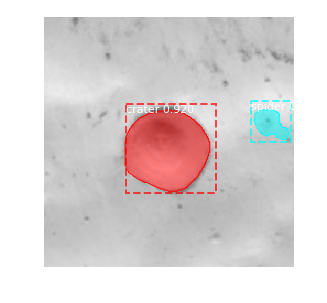

Processing 1 images
image                    shape: (227, 227, 3)         min:    5.00000  max:  207.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  102.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



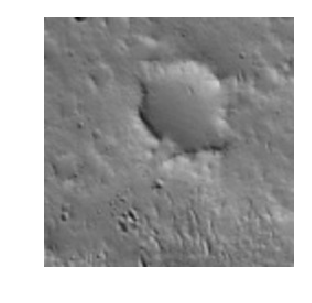

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  216.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  107.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


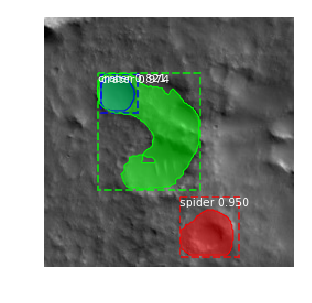

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


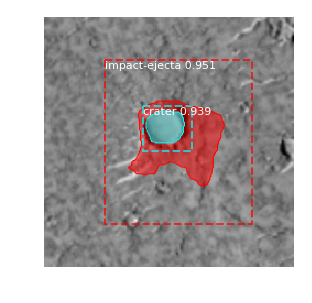

Processing 1 images
image                    shape: (227, 227, 3)         min:   52.00000  max:  141.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   36.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


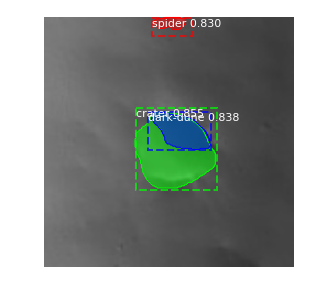

Processing 1 images
image                    shape: (227, 227, 3)         min:   38.00000  max:  209.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  104.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



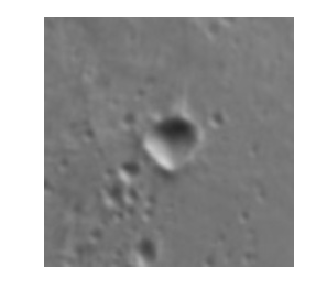

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  145.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


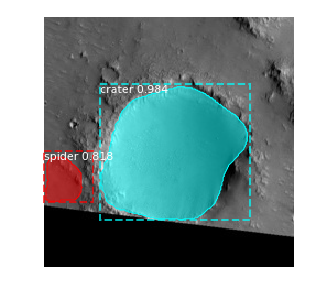

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  252.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


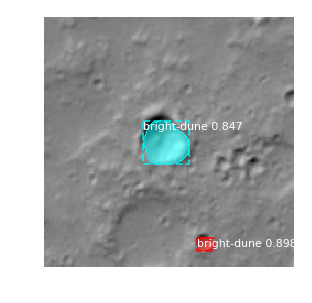

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  231.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  126.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


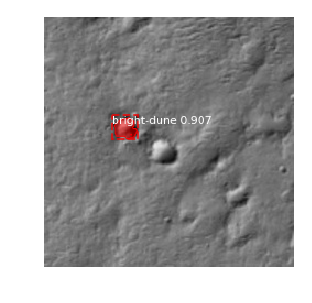

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


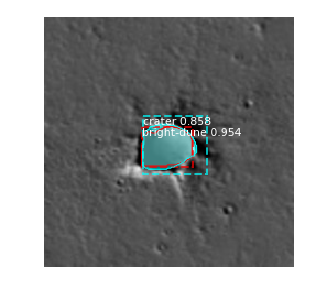

################################################################################################

########################## dark-dune ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:    7.00000  max:  216.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  109.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


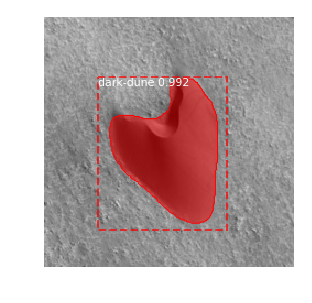

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  208.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  102.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


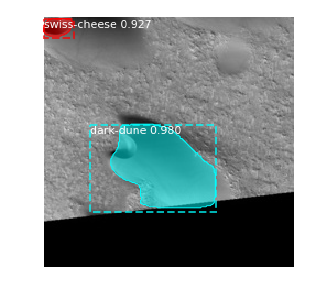

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:   51.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -53.90000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


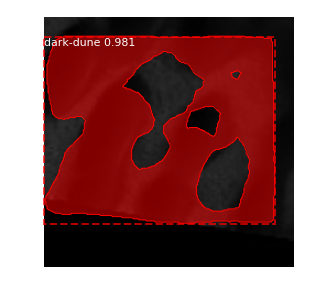

Processing 1 images
image                    shape: (227, 227, 3)         min:   17.00000  max:   77.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -27.90000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


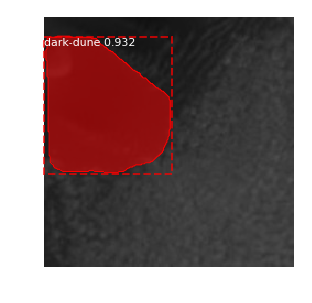

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:   93.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -12.90000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


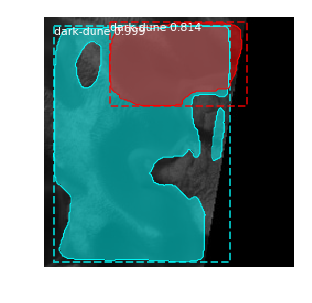

Processing 1 images
image                    shape: (227, 227, 3)         min:   10.00000  max:  198.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   92.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


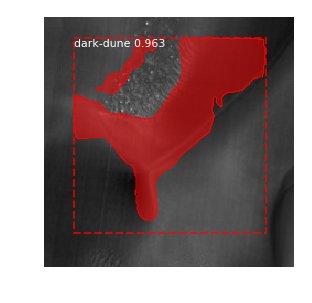

Processing 1 images
image                    shape: (227, 227, 3)         min:   14.00000  max:  216.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  108.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


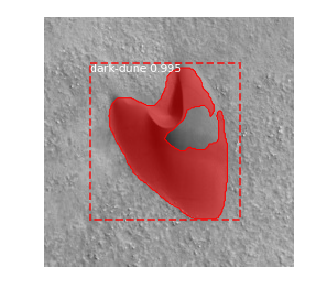

Processing 1 images
image                    shape: (227, 227, 3)         min:   45.00000  max:  236.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  129.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



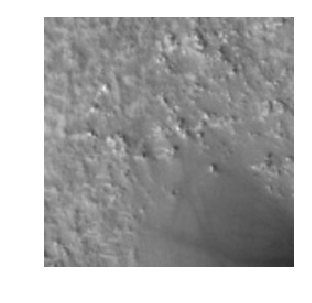

Processing 1 images
image                    shape: (227, 227, 3)         min:   15.00000  max:   84.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  -20.90000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


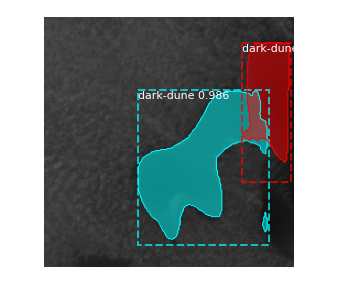

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:   96.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   -8.90000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


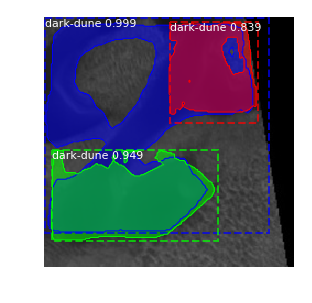

################################################################################################

########################## slope-streak ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:  159.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


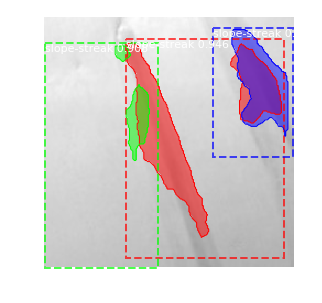

Processing 1 images
image                    shape: (227, 227, 3)         min:   24.00000  max:  167.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   63.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



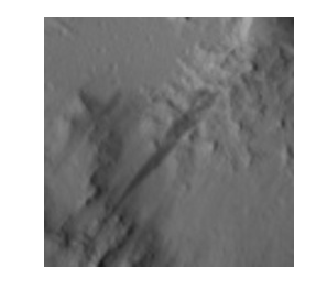

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


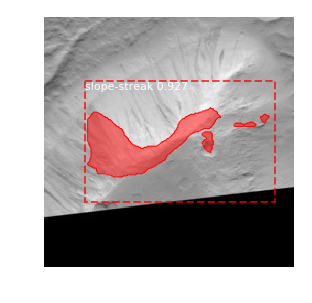

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  253.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


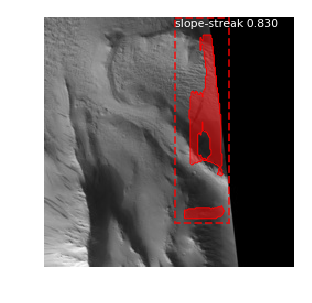

Processing 1 images
image                    shape: (227, 227, 3)         min:  144.00000  max:  237.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  133.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


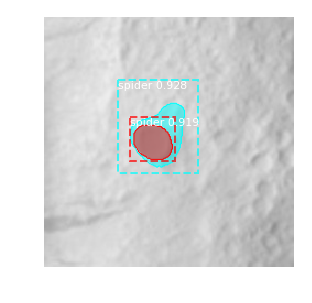

Processing 1 images
image                    shape: (227, 227, 3)         min:   70.00000  max:  208.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  103.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


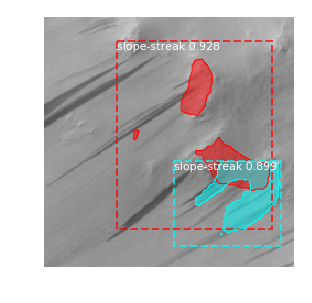

Processing 1 images
image                    shape: (227, 227, 3)         min:  132.00000  max:  251.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  146.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


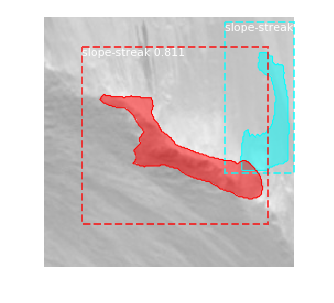

Processing 1 images
image                    shape: (227, 227, 3)         min:  107.00000  max:  249.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


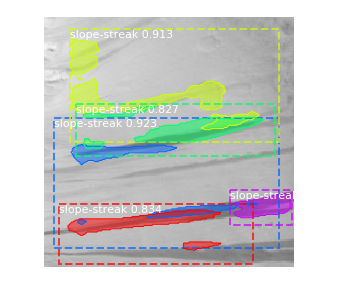

Processing 1 images
image                    shape: (227, 227, 3)         min:   89.00000  max:  184.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   79.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


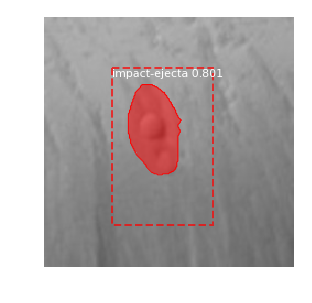

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  172.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   66.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


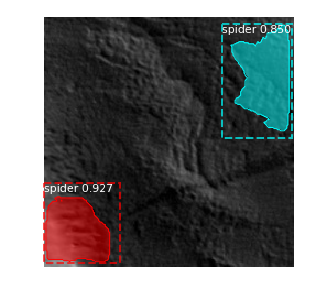

################################################################################################

########################## bright-dune ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:   20.00000  max:  232.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  127.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


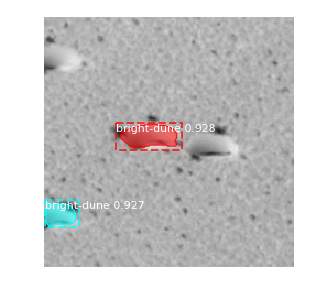

Processing 1 images
image                    shape: (227, 227, 3)         min:    6.00000  max:  243.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


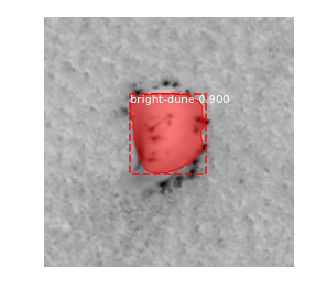

Processing 1 images
image                    shape: (227, 227, 3)         min:    6.00000  max:  243.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


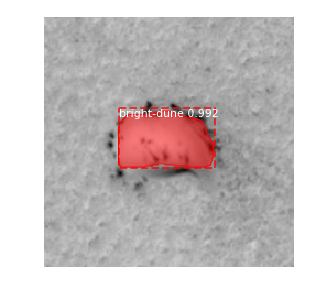

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


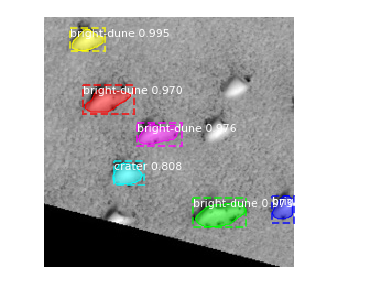

Processing 1 images
image                    shape: (227, 227, 3)         min:    2.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


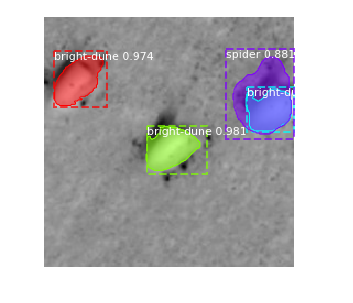

Processing 1 images
image                    shape: (227, 227, 3)         min:   40.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


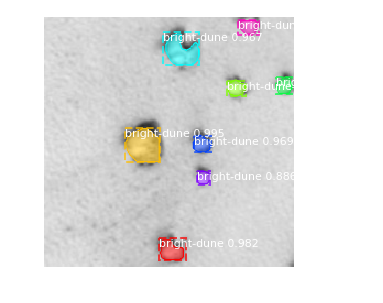

Processing 1 images
image                    shape: (227, 227, 3)         min:    9.00000  max:  248.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  143.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


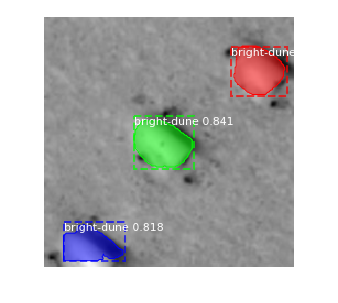

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  255.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  150.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


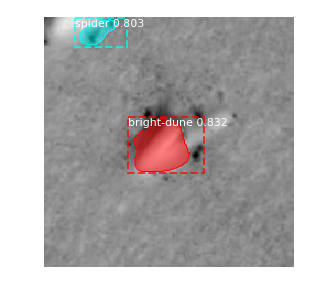

Processing 1 images
image                    shape: (227, 227, 3)         min:    2.00000  max:  252.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  148.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


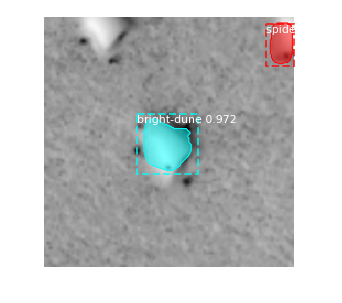

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  241.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  136.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


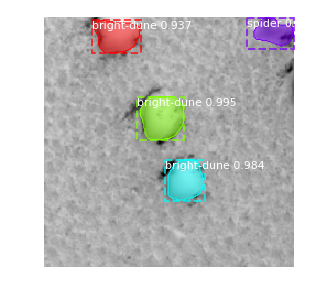

################################################################################################

########################## impact-ejecta ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:    5.00000  max:  242.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  133.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


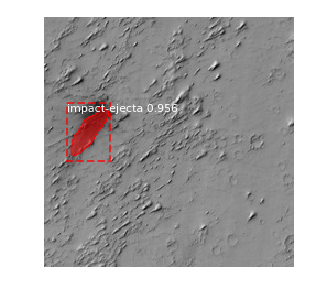

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  218.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  112.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


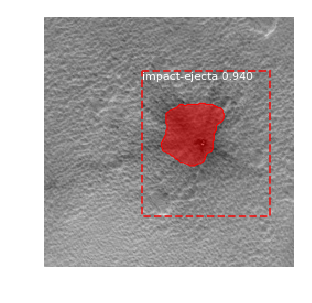

Processing 1 images
image                    shape: (227, 227, 3)         min:    4.00000  max:  232.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  127.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


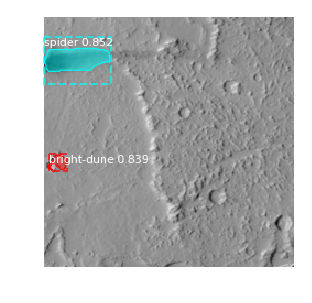

Processing 1 images
image                    shape: (227, 227, 3)         min:    3.00000  max:  244.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


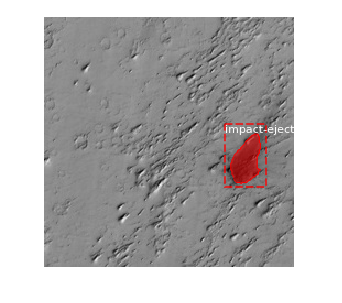

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  254.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  147.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


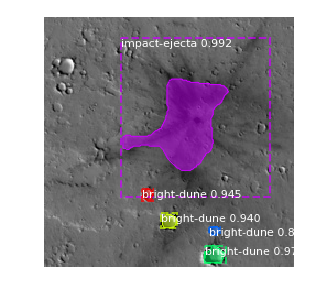

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  200.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   91.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


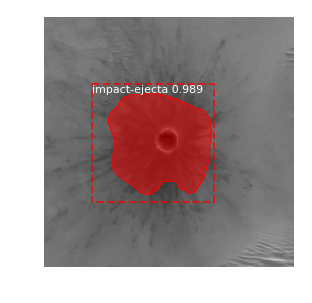

Processing 1 images
image                    shape: (227, 227, 3)         min:    5.00000  max:  220.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  115.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


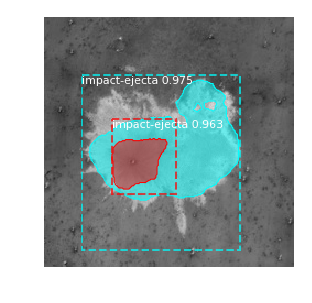

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  137.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   32.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


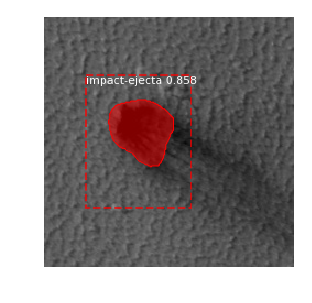

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  199.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   89.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


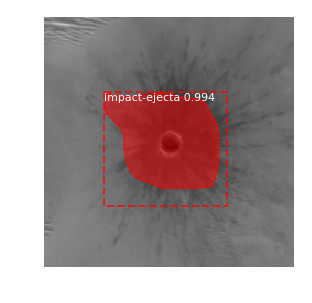

Processing 1 images
image                    shape: (227, 227, 3)         min:    5.00000  max:  226.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  119.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


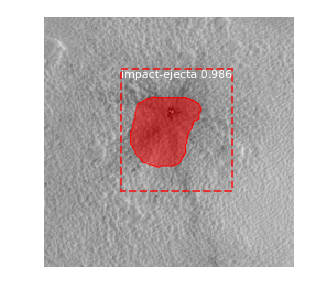

################################################################################################

########################## swiss-cheese ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  179.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   72.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


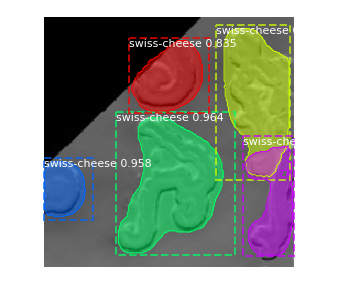

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  207.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  101.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


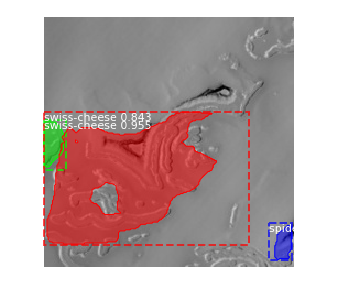

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  176.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   69.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


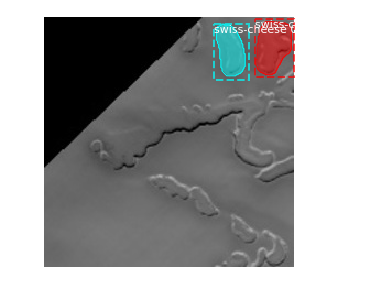

Processing 1 images
image                    shape: (227, 227, 3)         min:   13.00000  max:  223.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  114.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



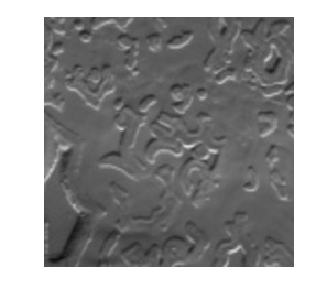

Processing 1 images
image                    shape: (227, 227, 3)         min:    5.00000  max:  236.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  129.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


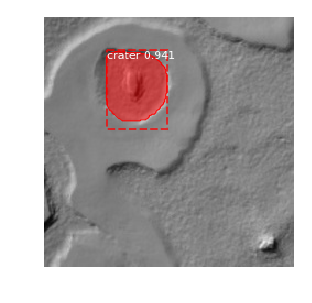

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  238.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  131.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


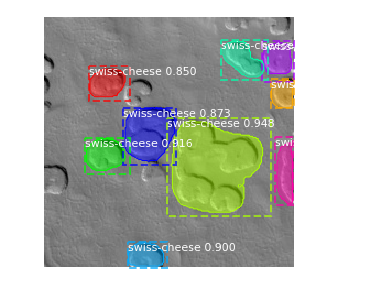

Processing 1 images
image                    shape: (227, 227, 3)         min:   10.00000  max:  193.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   88.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


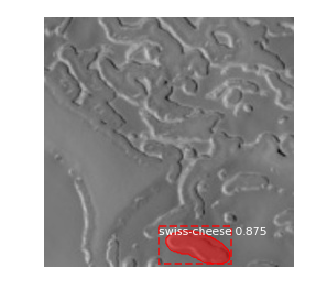

Processing 1 images
image                    shape: (227, 227, 3)         min:    1.00000  max:  195.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   89.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


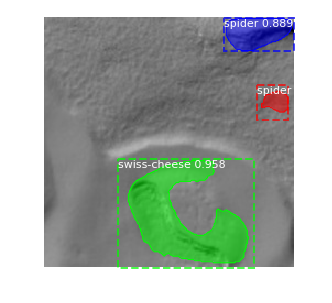

Processing 1 images
image                    shape: (227, 227, 3)         min:   44.00000  max:  194.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   89.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


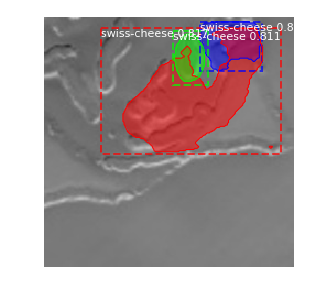

Processing 1 images
image                    shape: (227, 227, 3)         min:   55.00000  max:  216.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  110.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


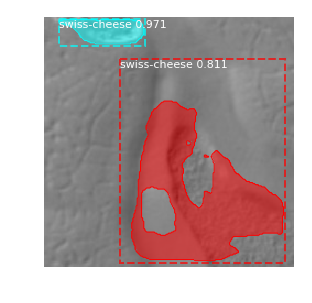

################################################################################################

########################## spider ####################################
Processing 1 images
image                    shape: (227, 227, 3)         min:   36.00000  max:  187.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   82.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


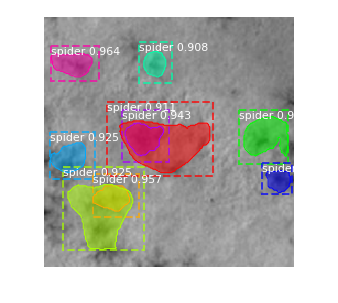

Processing 1 images
image                    shape: (227, 227, 3)         min:   34.00000  max:  241.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  134.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


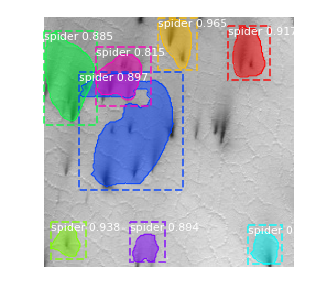

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  220.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  112.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


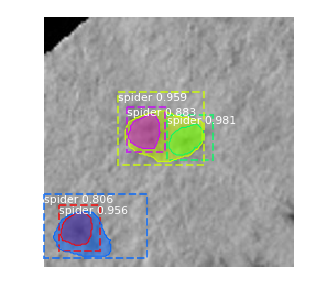

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  172.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   67.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


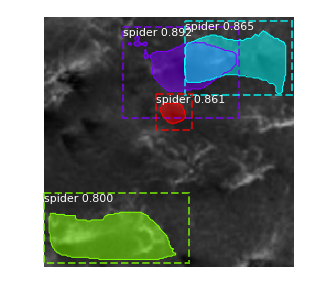

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  146.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   41.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32

*** No instances to display *** 



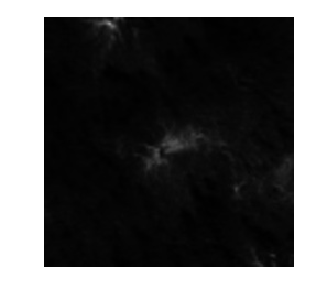

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  233.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  128.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


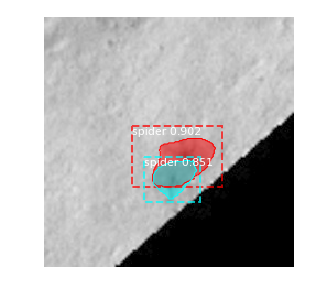

Processing 1 images
image                    shape: (227, 227, 3)         min:   33.00000  max:  208.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  102.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


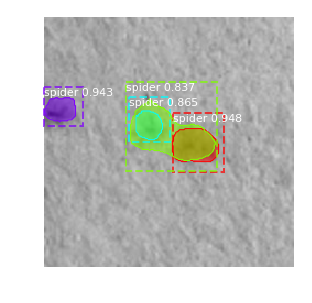

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  198.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   90.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


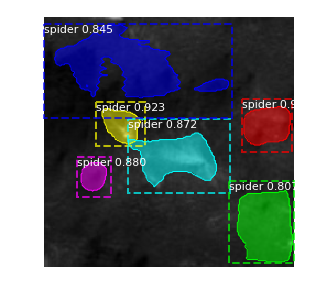

Processing 1 images
image                    shape: (227, 227, 3)         min:   49.00000  max:  243.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:  138.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


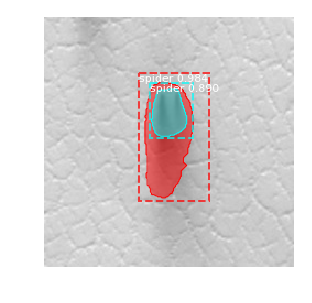

Processing 1 images
image                    shape: (227, 227, 3)         min:    0.00000  max:  184.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   77.10000  float64
image_metas              shape: (1, 20)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32


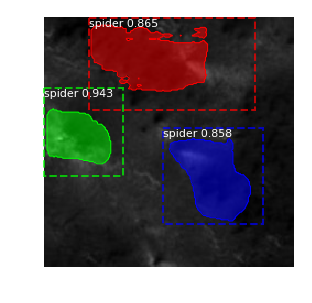

################################################################################################



In [5]:
# Directory of images to run detection on
DATA_SOURCE_DIR_NAME = "HiRISE"
# The model is been trained on 1, 3, 4, 5, 6 classes
TEST_ID_BY_CLASS = [1,2,3,4,5,6,7]

# Load a random image from the images folder
id_name_map = {0:"BG", 1: "crater", 2: "dark-dune", 3: "slope-streak", 
               4:"bright-dune", 5: "impact-ejecta", 6:"swiss-cheese", 7:"spider"}

for test_id_class in TEST_ID_BY_CLASS:
    IMAGE_DIR = os.path.join(ROOT_DIR, "datasets/" + DATA_SOURCE_DIR_NAME + "/anomaly/test/" + 
                             str(test_id_class))
    file_names = next(os.walk(IMAGE_DIR))[2]
    random.shuffle(file_names)
    count = 10
    i = 0
    print("########################## " + id_name_map[test_id_class] +" ####################################")
    for file in file_names:
        if i < count:
            image = skimage.io.imread(os.path.join(IMAGE_DIR, file))
            stacked_img = np.stack((image,)*3, axis=-1)
            # Run detection
            results = model.detect([stacked_img], verbose=1)

            # Visualize results
            r = results[0]
            visualize.display_instances(stacked_img, r['rois'], r['masks'], r['class_ids'], 
                                        class_names, r['scores'], figsize=(5,5))
            i += 1
    print("################################################################################################")
    print()